In [1]:
'''3 ####### to be revised'''

'3 ####### to be revised'

In [2]:
import numpy as np
import pickle
#import operator
import matplotlib.pyplot as plt  #
import matplotlib.image as mpimg  #
from gensim import corpora, models  #

In [3]:
dataset = 'imagenet'
percentileset = 'imagenet'


image_conv5 = np.load('data/' + dataset + '_conv5.npy')             ######### dataset conv5
percentile_conv5 = np.load('data/' + percentileset + '_percentile_conv5.npy')
# Load image id list
img_list = np.load('data/' + dataset + '_raw_image_list.npy')      ######### dataset image list

In [4]:
##########
binary_vector_conv5 = np.sum(np.sum(np.greater(image_conv5, percentile_conv5).astype(int), axis=1),axis=1)

In [5]:
print("Data shape: ", binary_vector_conv5.shape)

Data shape:  (2946, 256)


In [6]:
# Define parameters for topic modelling# Defin 
num_topics = [20] #[10, 20, 50]
num_words = 256                                          # Number of top features to be displayed per topic
num_images = binary_vector_conv5.shape[0]


In [7]:
# Prepare for corpus
corpus_conv5 = [[(j, binary_vector_conv5[i, j]) for j in range(num_words) if binary_vector_conv5[i, j]==1] for i in range(num_images)]
corpora.MmCorpus.serialize('data/corpus_conv5.mm', corpus_conv5)

# Load corpus
corpus = corpora.MmCorpus('data/corpus_conv5.mm')
print(corpus[:2])


In [8]:
for K in num_topics:
    # Create the Topic Model
    model_name = str(K) + '-topics.model'
    lda = models.ldamodel.LdaModel(corpus, num_topics = K)
    lda.save('data/' + model_name)

    # Get topic for each image
    img_by_topic = [[] for _ in range(K)]
    for i in range(num_images):
        ind, val = sorted(lda.get_document_topics(corpus[i]), key=lambda x:x[1])[-1]
        img_by_topic[ind].append((i, val))

    for j in range(K):
        img_by_topic[j].sort(key = lambda x: -x[1])

    # Save results
    with open("data/" + str(K) + "-topic-res-conv5.txt", "wb") as fp:
        pickle.dump(img_by_topic, fp)

# # Or load the saved model
# ldamodel = gensim.models.ldamodel.LdaModel.load("../2 topics/"+model_name)

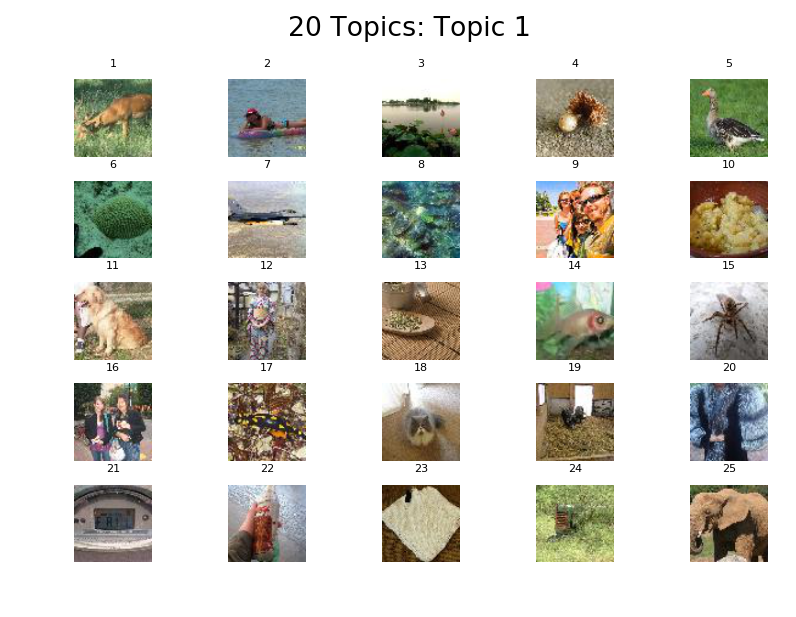

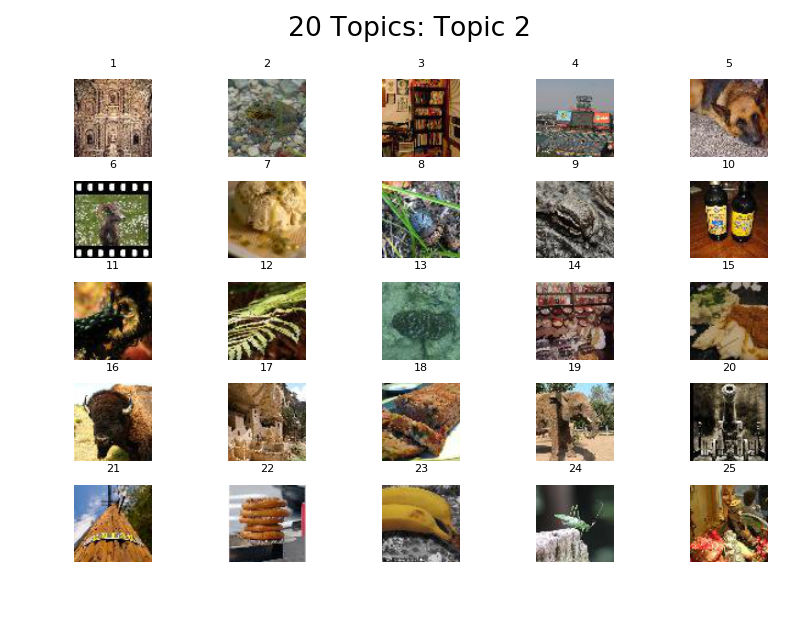

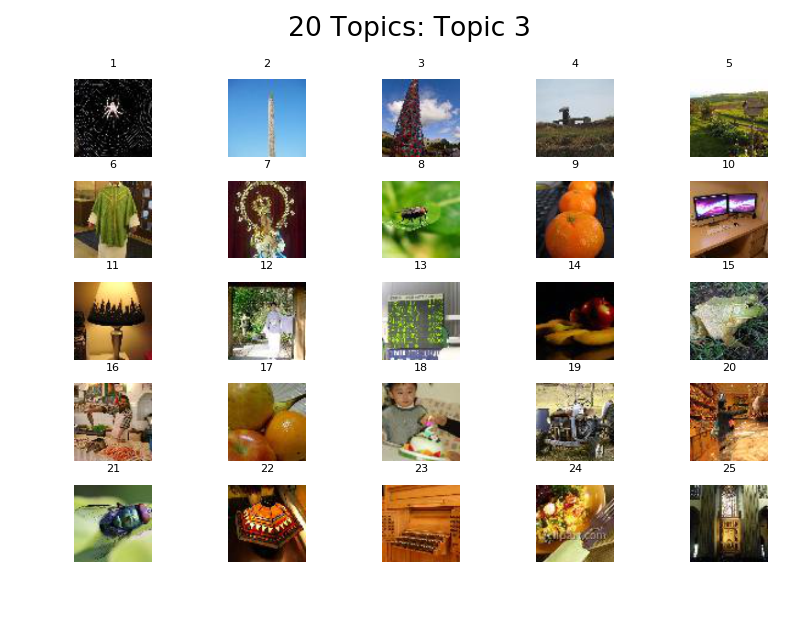

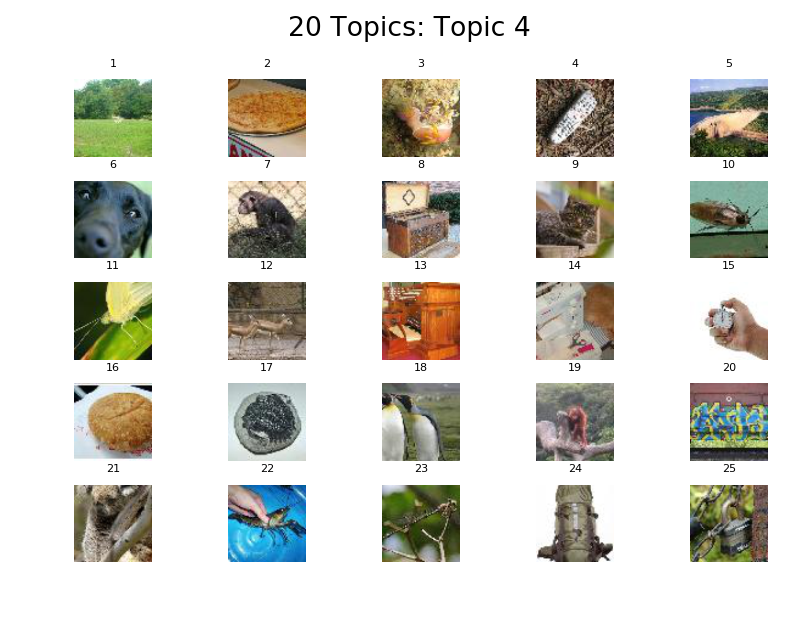

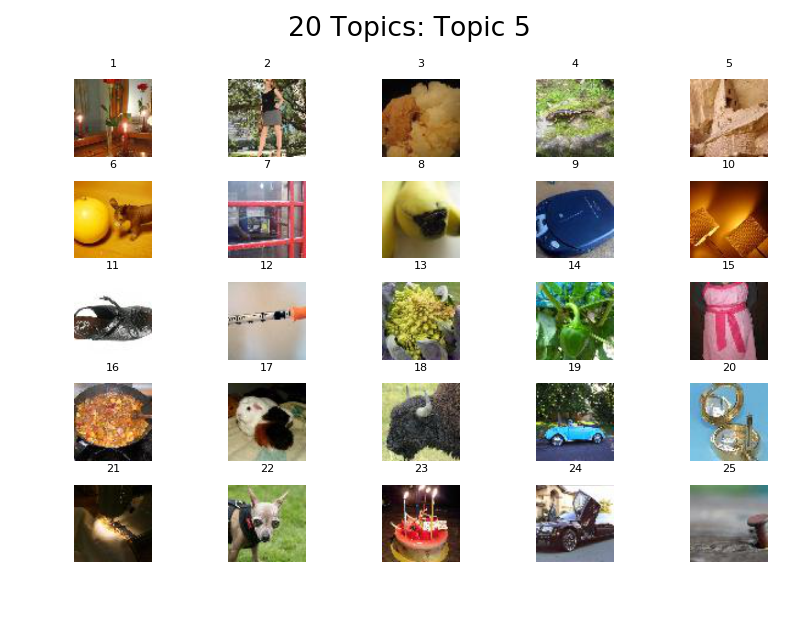

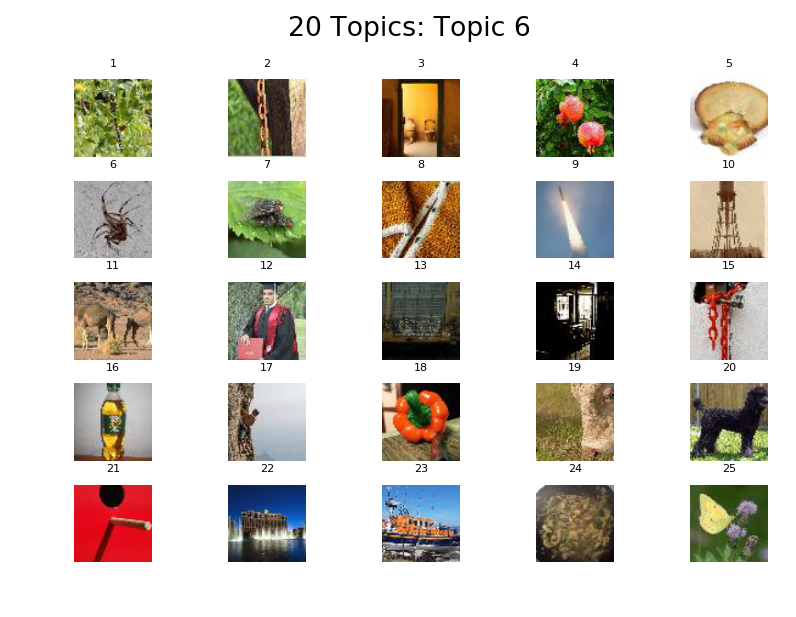

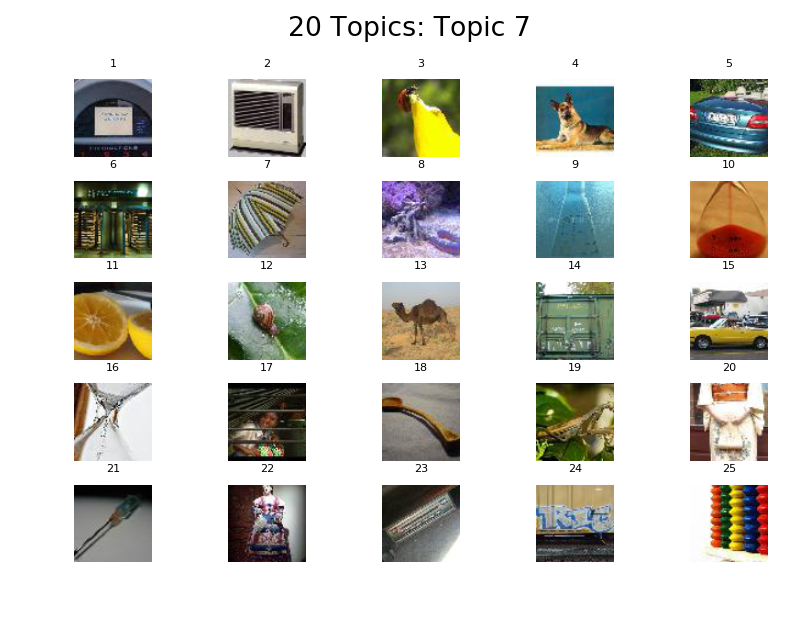

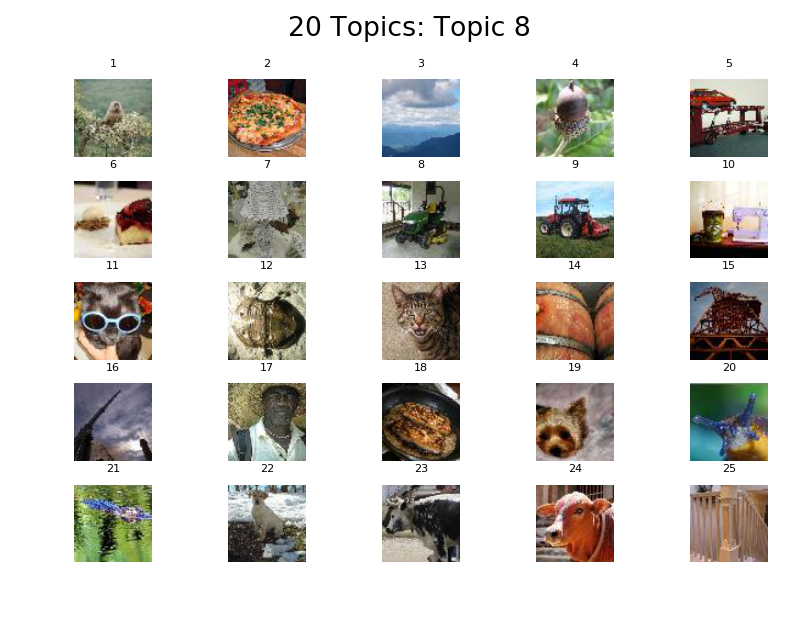

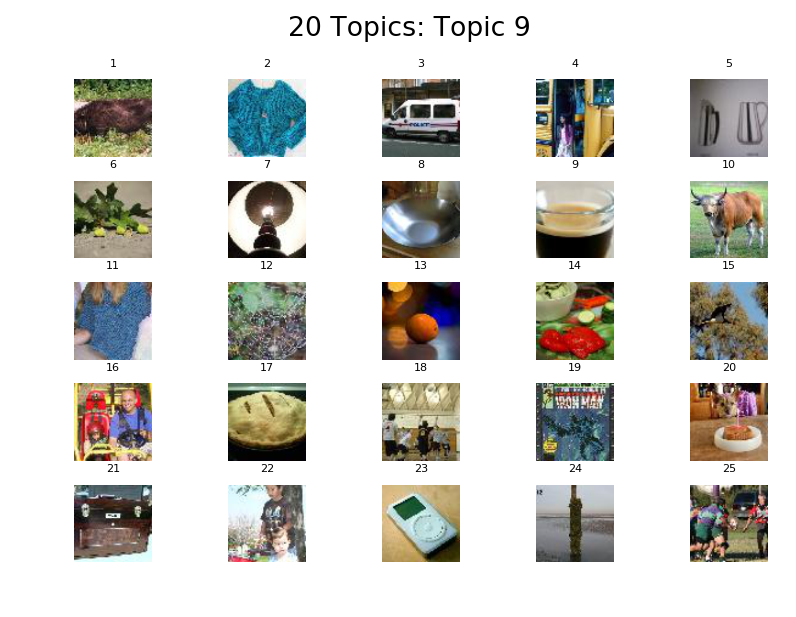

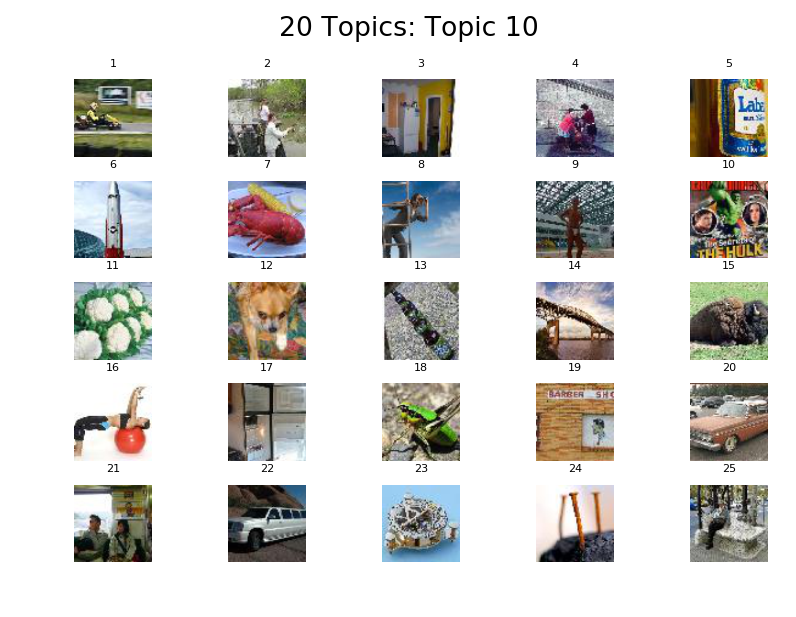

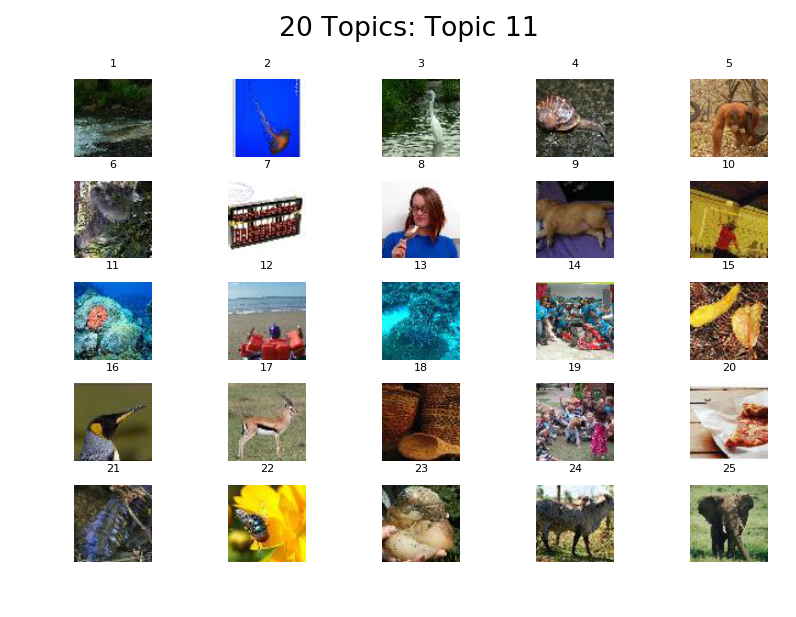

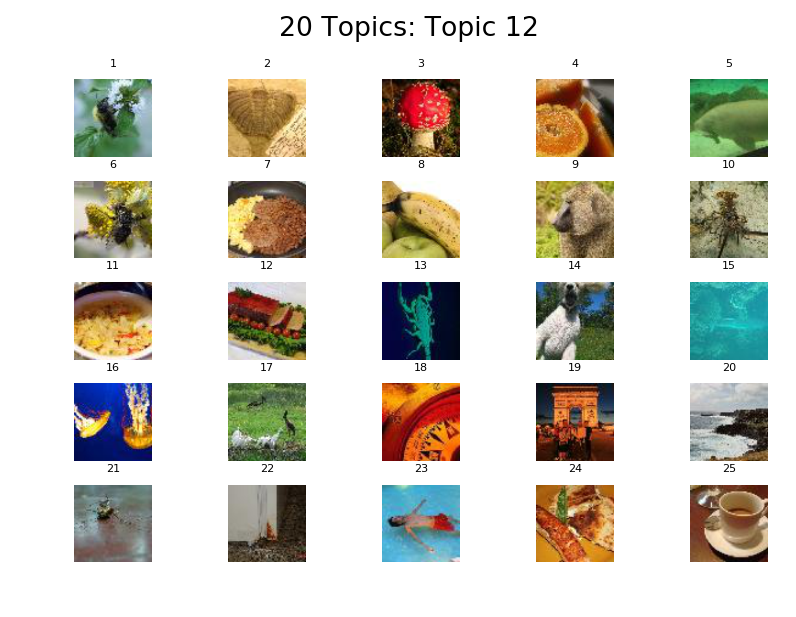

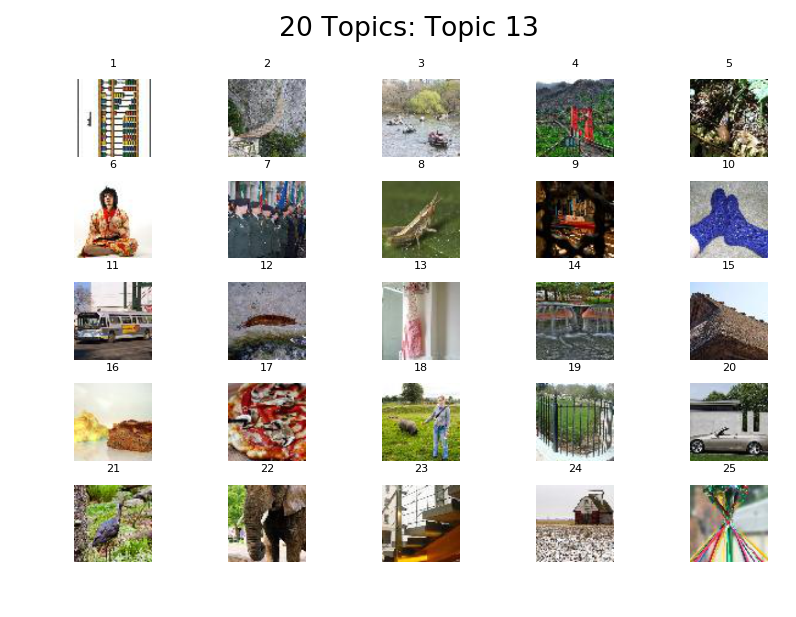

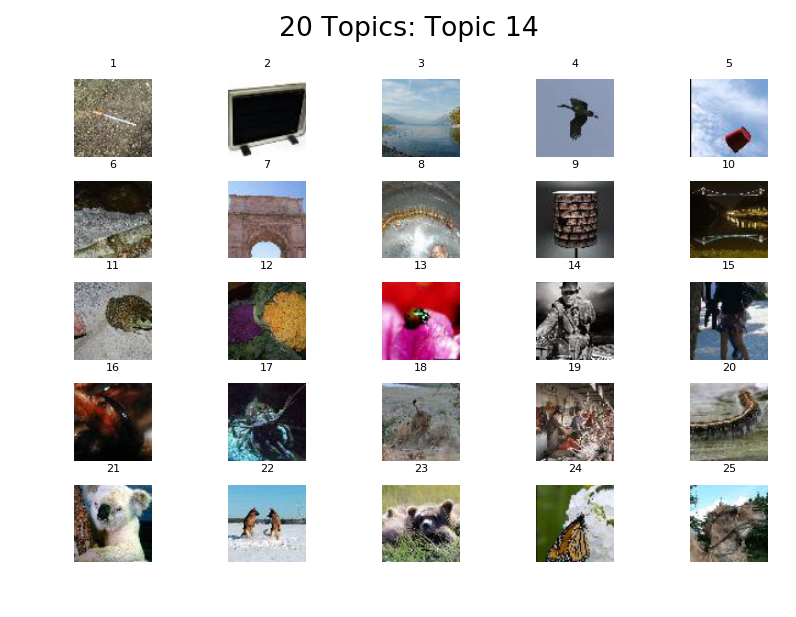

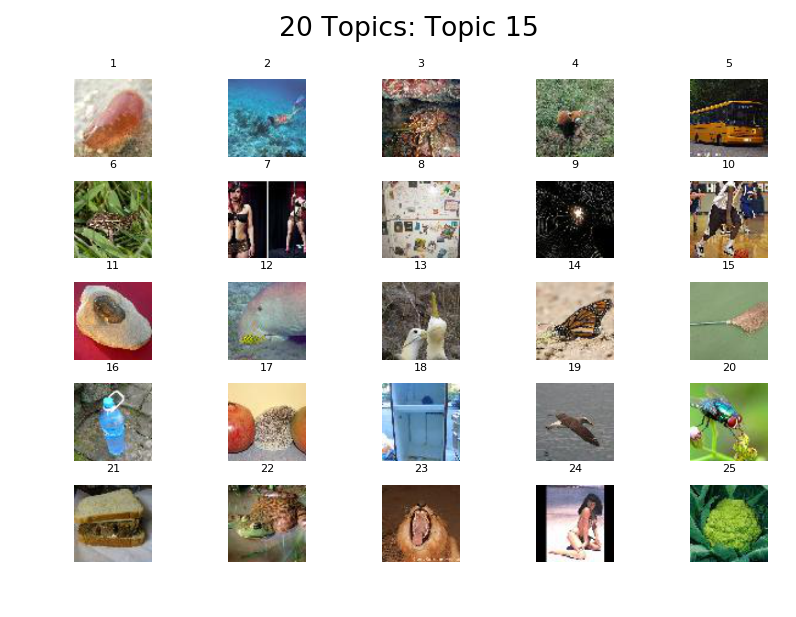

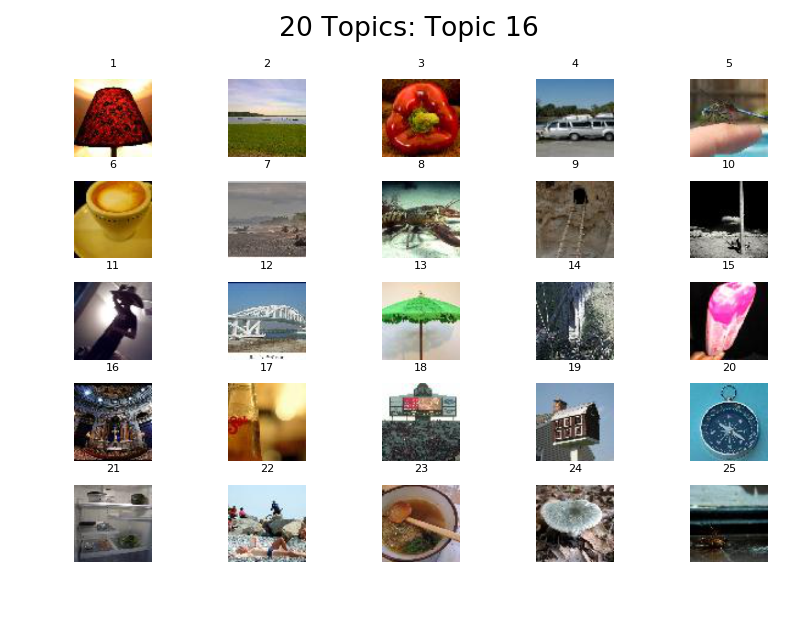

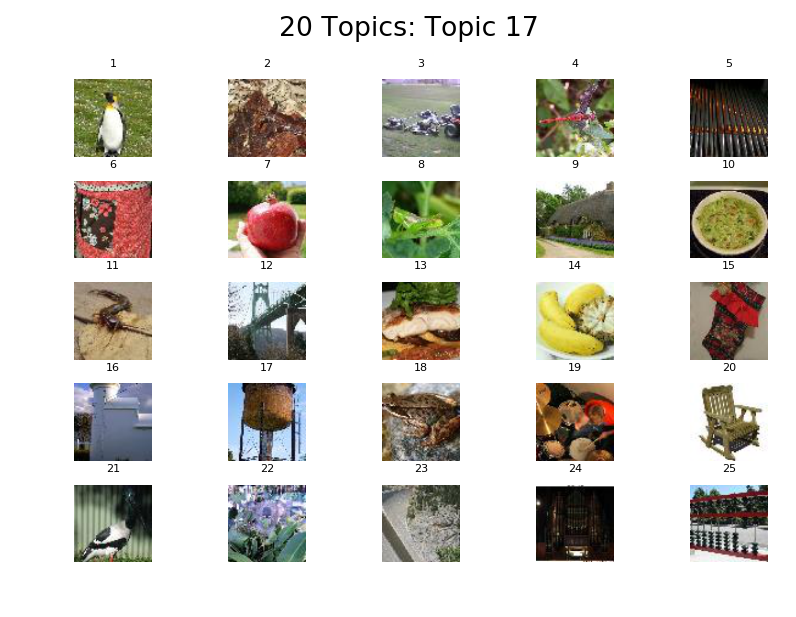

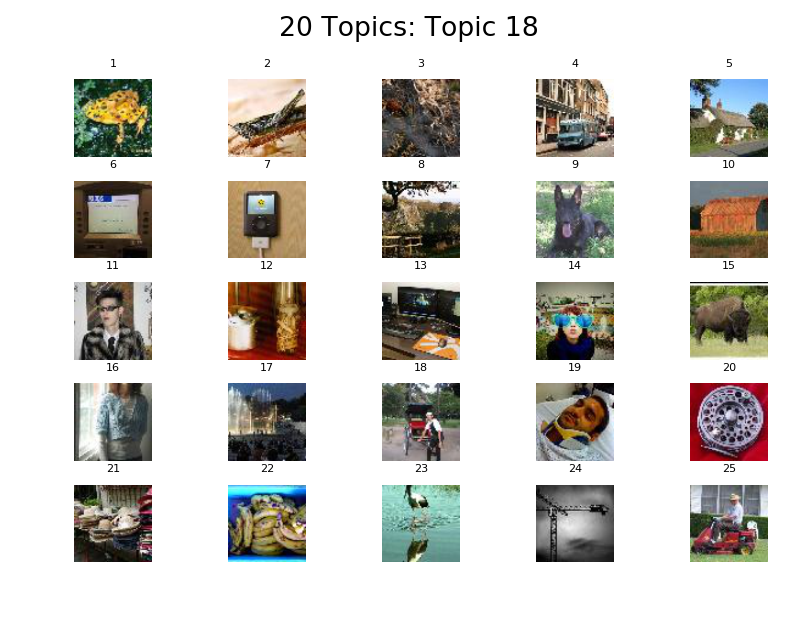

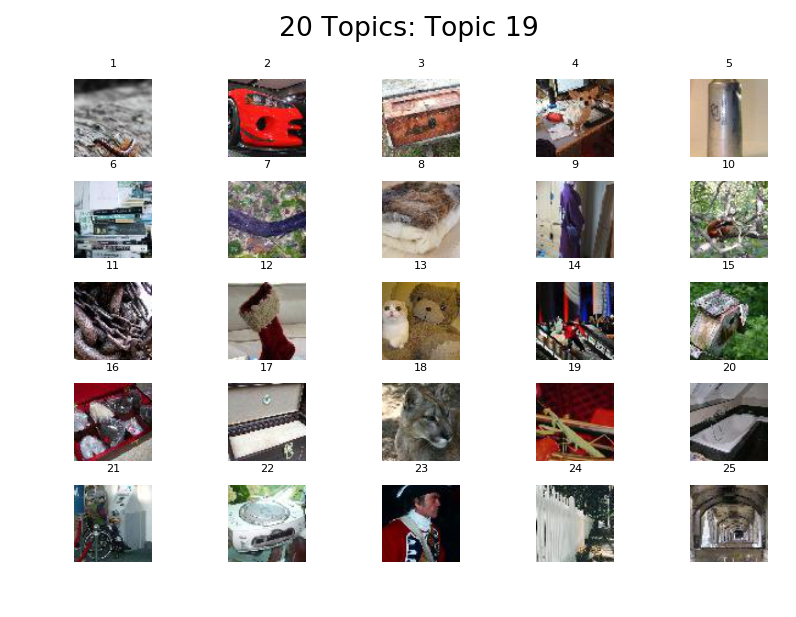

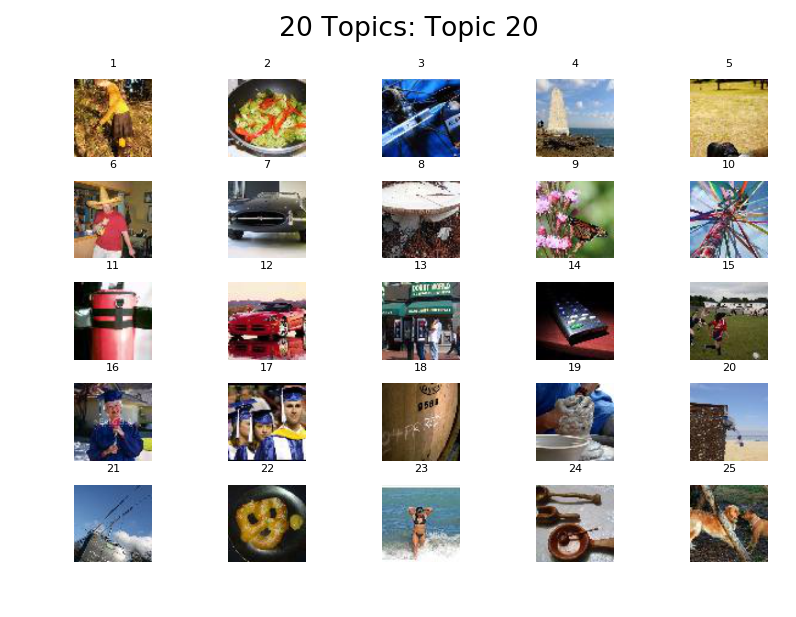

In [9]:
for K in num_topics:
    with open("data/" + str(K) + "-topic-res-conv5.txt", "rb") as fp:
        img_by_topic = pickle.load(fp)  
    
    top_list = range(K)
    for topic in top_list:
        fig, ax = plt.subplots(nrows=5, ncols=5, dpi=160)
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
        fig.suptitle(str(K)+' Topics: Topic '+str(topic+1))
        i = 0
        try:
            for row in ax:
                for col in row:
                    I = img_list[img_by_topic[topic][i][0]]
                    i += 1
                    col.axis('off')
                    col.imshow(I)
                    col.set_title(i, fontsize=5)
                    col.imshow(I)         
            plt.show()  
        except:
            print ('No samples in current topic')
        